# Task_3 : 
# Build A Decsion tree classifer to predict wheather a Customer will purchased  a Product 
# Or Service based on their demographic and Behaviour data 
# we are used the Bank Markating dataset form the Uci Machine learning Repository 

# This data is related to the marketing campaigns of a bank in Portugal, where customers were contacted via phone calls. The goal was to determine whether a customer would open a term deposit account or not.

### The dataset includes various information such as:

- Age
- Job
- Education
- Bank Balance
- Loan Status
## Results of Previous Marketing Campaigns
## The main objective of this data is to predict which customer will subscribe to a term deposit.

# The "y" column is the target variable that indicates:

- "Yes" (1): The customer subscribed to the term deposit.
- "No" (0): The customer did not subscribe to the term deposit.

In [98]:
# import all dependancy for the model Traning 
import os 
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib .pyplot as plt
import sklearn 
from sklearn .model_selection import train_test_split
from sklearn .preprocessing import OneHotEncoder , LabelEncoder ,StandardScaler 
from sklearn .tree import DecisionTreeClassifier ,plot_tree
from mlxtend. plotting import decision_regions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier ,BaggingClassifier

In [3]:
# load the dataset 
df  = pd.read_csv('bank.csv')

In [6]:
# checking the first 10 rows 
df.head(10)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
5,"35;""management"";""single"";""tertiary"";""no"";747;""..."
6,"36;""self-employed"";""married"";""tertiary"";""no"";3..."
7,"39;""technician"";""married"";""secondary"";""no"";147..."
8,"41;""entrepreneur"";""married"";""tertiary"";""no"";22..."
9,"43;""services"";""married"";""primary"";""no"";-88;""ye..."


# SO the data Are Not Good Formate 

In [71]:
# Load the dataset with semicolon as the delimiter
file_path = "bank.csv"  # Replace with actual file path
df = pd.read_csv(file_path, delimiter=";", dtype=str)  # Read as string for cleaning

# Remove quotes from column names
df.columns = df.columns.str.replace('"', '')

# Remove quotes from all values in the dataset
df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)

# Convert numeric columns to proper data types
numeric_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the data is a Pandas DataFrame
df = pd.DataFrame(df)


# Save cleaned dataset (optional)
df.to_csv("cleaned_bank_marketing.csv", index=False)


C:\Users\DELL\AppData\Local\Temp\ipykernel_3460\4249485934.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)


In [72]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


# Convert binary categorical variables into 0 and 1

In [73]:
# Convert text to lowercase and remove spaces
df["job"] = df["job"].str.lower().str.strip()
df["education"] = df["education"].str.lower().str.strip()
df["loan"] = df["loan"].str.lower().str.strip()
df["y"] = df["y"].str.lower().str.strip()

# Define encoding for "education" (Multi-Class)
education_mapping = {
    "unknown": 0,
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}
df["education"] = df["education"].map(education_mapping)

# Define encoding for "job" (Multi-Class)
job_mapping = {
    "unknown": 0,
    "management": 1,
    "blue-collar": 2,
    "technician": 3,
    "admin.": 4,
    "services": 5,
    "retired": 6,
    "self-employed": 7,
    "entrepreneur": 8,
    "unemployed": 9,
    "housemaid": 10,
    "student": 11
}
df["job"] = df["job"].map(job_mapping)

# Convert "loan" and "y" (Binary Encoding: Yes = 1, No = 0)
df["loan"] = df["loan"].map({"yes": 1, "no": 0})
df["y"] = df["y"].map({"yes": 1, "no": 0})


In [74]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,married,1,no,1787,no,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,5,married,2,no,4789,yes,1,cellular,11,may,220,1,339,4,failure,0
2,35,1,single,3,no,1350,yes,0,cellular,16,apr,185,1,330,1,failure,0
3,30,1,married,3,no,1476,yes,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,2,married,2,no,0,yes,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,5,married,2,no,-333,yes,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,7,married,3,yes,-3313,yes,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,3,married,2,no,295,no,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,2,married,2,no,1137,no,0,cellular,6,feb,129,4,211,3,other,0


# EDA Performing 

In [75]:
df.describe()

,age,job,education,balance,loan,day,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,3.619332,2.065915,1422.657819,0.152842,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,2.586806,0.780906,3009.638142,0.359875,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,0.000000,0.000000,-3313.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,2.000000,2.000000,69.000000,0.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,3.000000,2.000000,444.000000,0.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,5.000000,3.000000,1480.000000,0.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,11.000000,3.000000,71188.000000,1.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   int64 
 2   marital    4521 non-null   object
 3   education  4521 non-null   int64 
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   int64 
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(11), object(6)
memory usage: 600.6+ KB


In [77]:
df["job"].value_counts()

job
1     969
2     946
3     768
4     478
5     417
6     230
7     183
8     168
9     128
10    112
11     84
0      38
Name: count, dtype: int64

In [78]:
df["education"].value_counts()

education
2    2306
3    1350
1     678
0     187
Name: count, dtype: int64

In [79]:
df["loan"].value_counts()

loan
0    3830
1     691
Name: count, dtype: int64

In [ ]:
# these are necessary columns so  make the visualized them 

- check the Relationship the columns for the dependent variable and Independent variable 

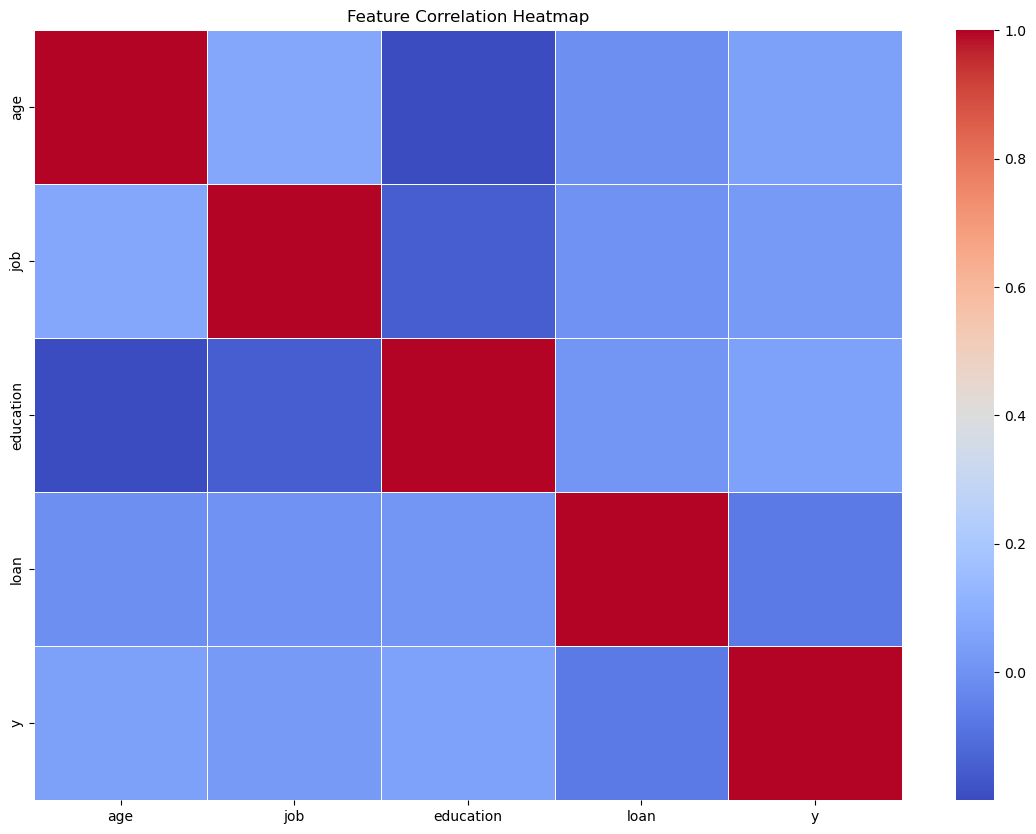

In [81]:
# 1️⃣ Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df[['age','job','education',"loan","y"]].corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

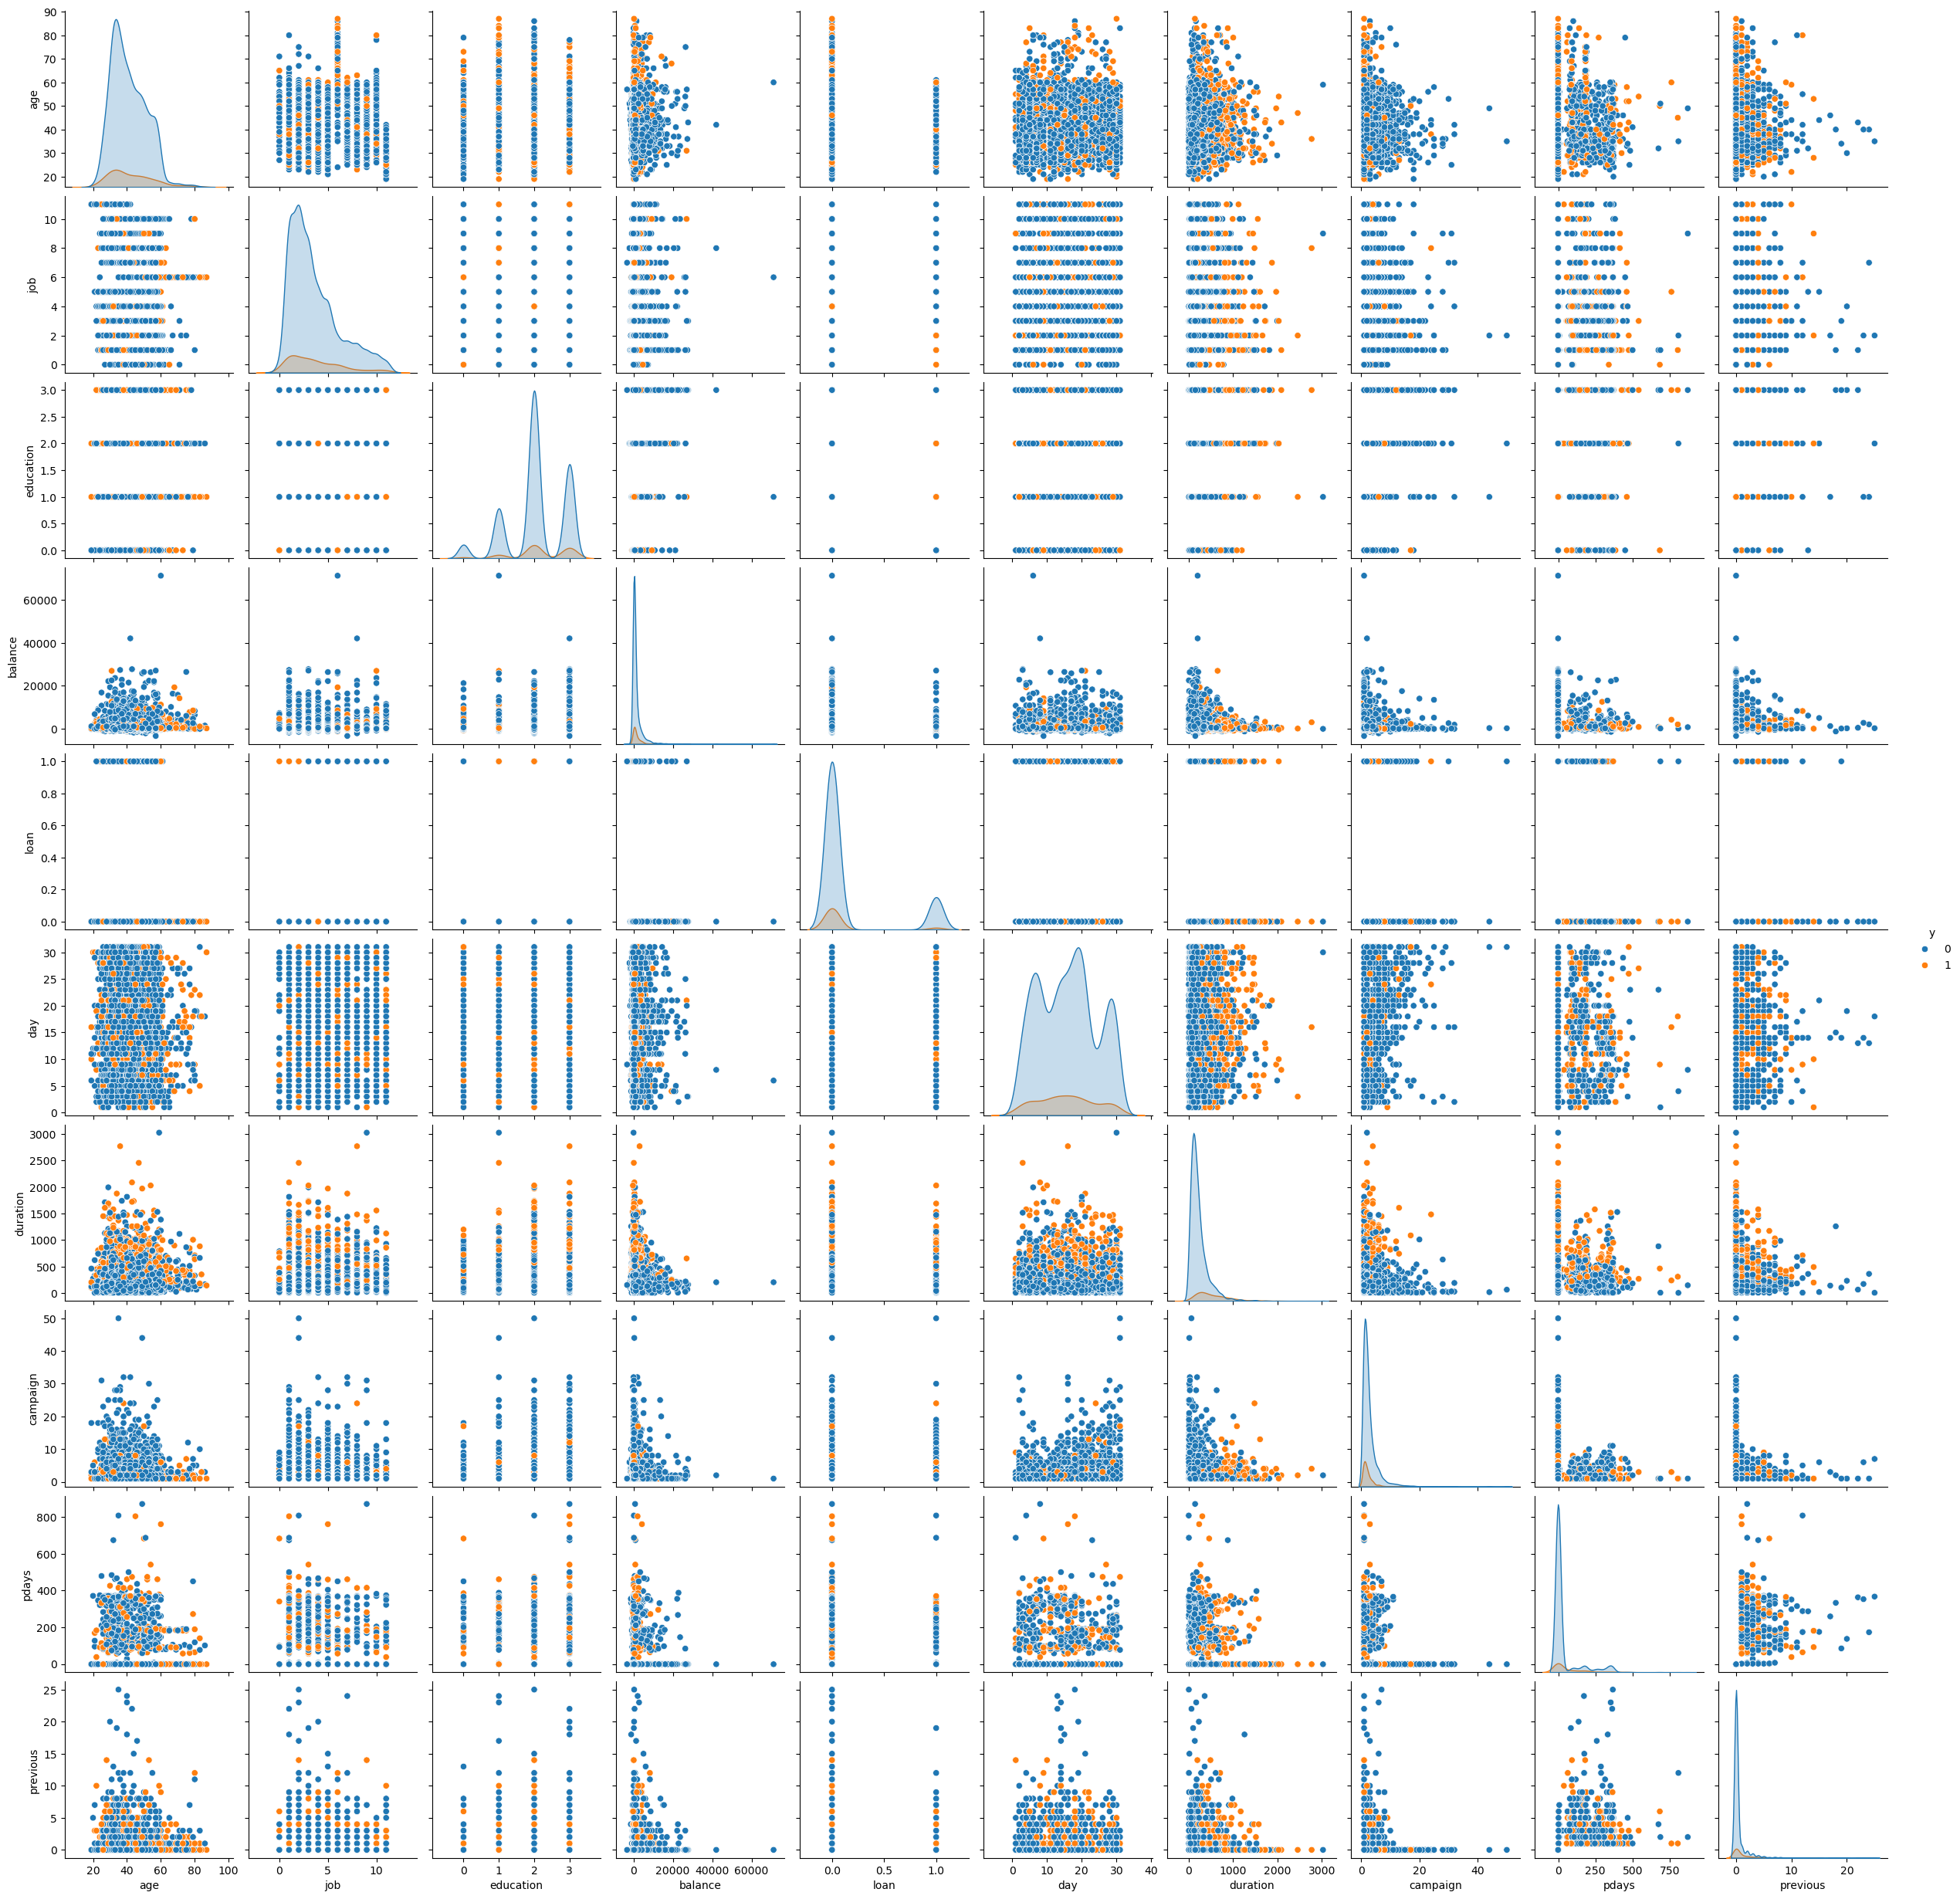

In [82]:
sns.pairplot(data = df ,hue="y")
plt.show()

# Model Bulding 

In [83]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [87]:
# Define features (X) and target variable (y)
X = df.drop(columns=["marital", "default", "housing", "contact", "day", "month", 
                     "duration", "campaign", "pdays", "previous", "poutcome", "y"])
y = df["y"]  # Target variable


In [135]:
X.tail(100)

,age,job,education,balance,loan
4421,30,1,3,7845,0
4422,37,5,1,260,0
4423,45,1,3,2048,0
4424,34,1,3,1557,1
4425,35,5,2,505,1
...,...,...,...,...,...
4516,33,5,2,-333,0
4517,57,7,3,-3313,1
4518,57,3,2,295,0
4519,28,2,2,1137,0


In [134]:
y.tail(100)

4421    0
4422    0
4423    1
4424    0
4425    0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 100, dtype: int64

- split the data into x_Train ,y_Train
- x_Test ,y_Test

In [109]:
x_train,x_test ,y_train ,y_test= train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)

# Normialzation Perfomance 

In [110]:
# to make the data into standerform 
Scaled = StandardScaler()
x_train_scaled =Scaled.fit_transform(x_train) 
x_test_scaled = Scaled.fit_transform(x_test)

In [111]:
x_train_scaled.shape

(3616, 5)

In [112]:
x_test_scaled.shape

(905, 5)

# ✅ Steps
- Preprocess Data (Handle categorical variables & missing values)
- Split Data into Train & Test Sets
- Decision Tree with Hyperparameter Tuning (GridSearchCV)
- Ensemble Methods (BaggingClassifier & Random Forest)
- Evaluate Model (Accuracy, Confusion Matrix, Classification Report)
- Make Predictions


# 🎯 Decision Tree with Hyperparameter Tuning

In [113]:
param_grid = {
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

In [114]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=10, scoring="accuracy")
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [115]:
# Best model
best_dt = grid_search.best_estimator_

In [116]:
best_dt

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42)

# 🎯 Bagging & Ensemble Method

In [120]:
# Bagging with Decision Trees
bagging = BaggingClassifier(estimator=best_dt, n_estimators=100, random_state=42)
bagging.fit(x_train_scaled, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=5,
                                                   min_samples_leaf=2,
                                                   random_state=42),
                  n_estimators=100, random_state=42)

In [121]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(x_train_scaled, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

# 🎯 Model Evaluation

In [123]:
models = {"Decision Tree": best_dt, "Bagging Classifier": bagging, "Random Forest": rf}
for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n📌 {name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


📌 Decision Tree Accuracy: 0.8906
Confusion Matrix:
 [[806   1]
 [ 98   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       807
           1       0.00      0.00      0.00        98

    accuracy                           0.89       905
   macro avg       0.45      0.50      0.47       905
weighted avg       0.80      0.89      0.84       905


📌 Bagging Classifier Accuracy: 0.8917
Confusion Matrix:
 [[807   0]
 [ 98   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       807
           1       0.00      0.00      0.00        98

    accuracy                           0.89       905
   macro avg       0.45      0.50      0.47       905
weighted avg       0.80      0.89      0.84       905


📌 Random Forest Accuracy: 0.8873
Confusion Matrix:
 [[803   4]
 [ 98   0]]
Classification Report:
               precision    recall  f1-sco

C:\Users\DELL\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 🎯 Prediction on New Data

In [124]:
new_data = np.array([[35, 1, 2, 1500, 0]])  # Example: [age, job, education, balance, loan]
prediction = rf.predict(new_data)
print("\nPrediction for new customer:", "Subscribed" if prediction[0] == 1 else "Not Subscribed")


Prediction for new customer: Subscribed


In [ ]:
# 2nd Predication  No => 4423  which are => 1 

In [136]:
new_data = np.array([[	45,	1	,3	,2048	,0]])  # Example: [age, job, education, balance, loan]
prediction = rf.predict(new_data)
print("\nPrediction for new customer:", "Subscribed" if prediction[0] == 1 else "Not Subscribed")


Prediction for new customer: Subscribed


In [137]:
# save the model
import pickle 

In [138]:
# Save the trained model
with open("decision_tree_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("Model saved successfully as decision_tree_model.pkl")

Model saved successfully as decision_tree_model.pkl


In [140]:
# ✅ Load the Model using Pickle
# Load the saved model
with open("decision_tree_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

